## Example: Evaluating New Marketing Campaigns Using Bayesian Inference 

Assume that we run an e-commerce platform for clothing and in order to bring people to our site, we deploy several digital marketing campaigns. These campaigns feature various ad images and captions, and are presented on a number of social networking websites. We want to present the ads that are the most successful. For the sake of simplicity, we can assume that the most successful campaign is the one that results in the highest click-through rate: the ads that are most likely to be clicked if shown.<br/>
We introduce a new campaign called <b>"facebook-yellow-dress"</b>, a campaign presented to Facebook users featuring a yellow dress. The ad has been presented to 10 users so far, and 7 of the users have clicked on it. <br/><b>We would like to estimate the probability that the next user will click on the ad.</b>
<br/>By encoding a <b>click as a success</b> and a <b>non-click as a failure</b>, we're estimating the <b>probability θ that a given user will click on the ad</b>. Naturally, we are going to use the campaign's historical record as evidence. Because we are considering unordered draws of an event that can be either 0 or 1, we can infer the probability θ by considering the campaign's history as a sample from a binomial distribution, with probability of success θ. Traditional approaches of inference consider multiple values of θ and pick the value that is most aligned with the data. This is known as <b>maximum likelihood</b>, because we're evaluating how likely our data is under various assumptions and choosing the best assumption as true.
##### More formally:
#####        argmax<sub>θ</sub>p(X |θ), where X is the data we've observed.
Here, p(X |θ) is our likelihood function; if we fix the parameter θ, what is the probability of observing the data we've seen? Let's look at the likelihood of various values of θ given the data we have for facebook-yellow-dress:

In [1]:
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)

In [2]:
def likelihood(theta, n, x):
    """
    likelihood function for a binomial distribution

    n: [int] the number of experiments
    x: [int] the number of successes
    theta: [float] the proposed probability of success
    """
    return (factorial(n) / (factorial(x) * factorial(n - x))) \
            * (theta ** x) * ((1 - theta) ** (n - x))


In [3]:
# number of impressions for our facebook-yellow-dress campaign
n_impressions = 10.

# number of clicks for our facebook-yellow-dress campaign
n_clicks = 7.

# observed click-through rate
ctr = n_clicks / n_impressions

In [4]:
# 0 to 1, all possible click-through rates
possible_theta_values = list(map(lambda x: x/100., range(100)))
print(possible_theta_values)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [5]:
# Evaluate the likelihood function for possible click-through rates
# likelihoods = list(map(lambda theta: likelihood(theta, n, x), possible_theta_values))
likelihoods = list(map(lambda theta: likelihood(theta, \
            n_impressions, n_clicks), possible_theta_values))
print(likelihoods)

#pick the best theta
print("np.argmax(likelihoods) = ", np.argmax(likelihoods)) # 70
mle = possible_theta_values[np.argmax(likelihoods)]
print("mle = ", mle)

[0.0, 1.1643588000000002e-12, 1.445670912e-10, 2.3952190211999993e-09, 1.73946175488e-08, 8.037890625000001e-08, 2.7901243514879987e-07, 7.949070922212003e-07, 1.9596325158912004e-06, 4.325168078758799e-06, 8.748000000000003e-06, 1.64854217432388e-05, 2.9302048633651192e-05, 4.958410402806121e-05, 8.045867004026884e-05, 0.00012591481640624995, 0.0001909233222156288, 0.0002815515825823813, 0.0004050702415245311, 0.000570048109015079, 0.0007864320000000004, 0.0010656082717993187, 0.0014204430293594114, 0.001865298210954302, 0.0024160210557861886, 0.00308990478515625, 0.0039056186961113097, 0.004883106266365743, 0.006043450297496374, 0.007408704575556593, 0.009001691999999995, 0.010845769618788597, 0.01296456150543237, 0.015381660918109741, 0.01812030368759931, 0.02120301528515624, 0.024651234519338185, 0.028484917297770303, 0.032722124361583414, 0.037378597352407325, 0.042467328000000006, 0.04799812561848708, 0.053977188466420536, 0.06040668485608639, 0.06728435018634364, 0.0746031063164

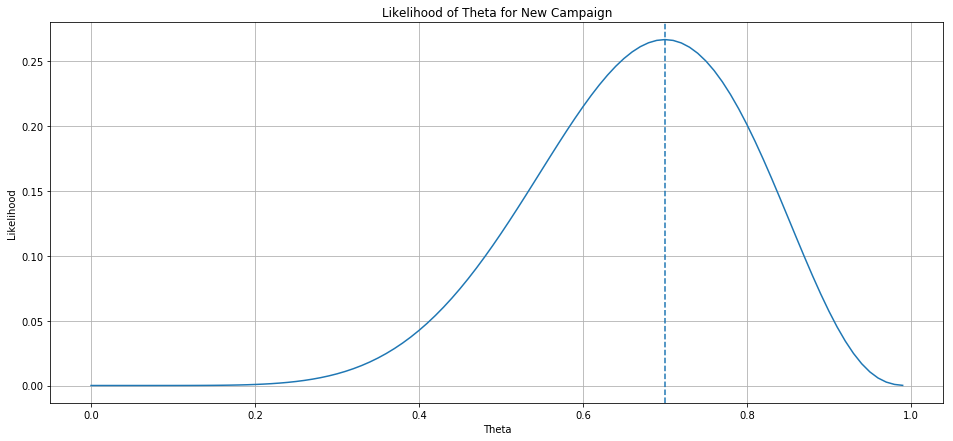

In [6]:
#plot
# subplots() - creates a figure and a grid of subplots with a single call, 
# while providing reasonable control over how the individual plots are created. 
f, ax = plt.subplots()

ax.plot(possible_theta_values, likelihoods) #ax.plot(x, y)

# Add a vertical line across the axes.
# arg1 - position in data coordinates of the vertical line
ax.axvline(mle, linestyle = "--")
ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")
plt.show()

#### Of the 10 people we showed the new ad to, 7 of them clicked on it. So naturally, our likelihood function is telling us that the most likely value of theta is 0.7.

#### However, some of our analysts are skeptical. The performance of this campaign seems extremely high given how our other campaigns have done historically. <br/>Let's overlay this likelihood function with the distribution of click-through rates from our previous 100 campaigns:

In [7]:
plt.rcParams['figure.figsize'] = (16, 7)
import numpy as np
import pandas as pd

In [8]:
true_a = 11.5
true_b = 48.5

# Number of marketing campaigns
N = 100 

# Randomly generate "true" click through rate for each campaign
# Draw samples from a Beta distribution.
# beta(alpha, beta, output_shape)
# Usage: If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
p = np.random.beta(true_a, true_b, size=N)
print(p)

[0.15871055 0.23347144 0.18558371 0.18310641 0.153445   0.17744686
 0.14181876 0.2852725  0.22375522 0.21733319 0.27990586 0.17045197
 0.20753813 0.13712654 0.16116036 0.15237703 0.20977528 0.19455976
 0.13942342 0.13300154 0.25683993 0.1034223  0.21302612 0.14845737
 0.24499752 0.17105851 0.21076148 0.28111287 0.22579444 0.23457876
 0.21074035 0.15480453 0.12878624 0.1306945  0.16016741 0.19357894
 0.19787194 0.14879456 0.24497663 0.20684859 0.17744839 0.26002398
 0.15981523 0.17566275 0.19233477 0.23599054 0.15392264 0.18973087
 0.14892907 0.22749624 0.15404844 0.1434077  0.16843985 0.16611556
 0.12295697 0.1934553  0.18934785 0.15515557 0.15499471 0.14518307
 0.21228421 0.21856025 0.24712569 0.21510817 0.13359811 0.21373986
 0.19000761 0.19834433 0.27963443 0.16619035 0.13716642 0.12273
 0.17802445 0.12972823 0.15587407 0.27855988 0.22282721 0.18050302
 0.24237503 0.22214135 0.2279387  0.18251381 0.29106452 0.14138828
 0.24523416 0.15834297 0.20007061 0.13937728 0.22101499 0.2259277

In [9]:
# Randomly pick the number of impressions for each campaign
# Return random integers from 1 (inclusive) to 10000 (exclusive).
# size: Output shape. 100 samples are drawn. 
impressions = np.random.randint(1, 10000, size=N)
print(impressions)

[ 840 3278 1944 9842 3378 7547 3524 6033 9343 8599  197 3945 5486 8602
 3289  388 1790 2253  503 8324 9504 1378 2238 2279 4458 7166 6312 6961
 4397 5262 2156 9655 8274 1995 5868 6412 4356 9317 3774 5097 7041 8312
 1230 6273  531 2670 8649 7655 2513 9103 7178 5072 9270 6717 3496 2399
 5368   73 4775 3782 4095 5840 2890 8842 7847  535 9765 7719 3701 7519
  413 5579 3810 7652 6920 9963 2016  277 9740  865 1821 4169 5770 3801
 6232 5036 3191 1718 3733 1353 6395 4893 3636 6625 2244 4978 7741 5522
 3799 3245]


In [10]:
#sample number of clicks for each campaign
clicks = np.random.binomial(impressions, p).astype(float)
print("clicks = ", clicks)

click_through_rates = clicks / impressions
print("click_through_rates = ", click_through_rates)

clicks =  [ 137.  757.  373. 1779.  555. 1304.  487. 1706. 2025. 1840.   51.  685.
 1114. 1179.  528.   56.  358.  447.   63. 1080. 2377.  130.  478.  343.
 1108. 1258. 1326. 1902.  969. 1304.  486. 1510. 1059.  260.  968. 1202.
  915. 1416.  960. 1091. 1244. 2151.  164. 1087.  114.  632. 1346. 1429.
  386. 2098. 1070.  775. 1618. 1050.  463.  464. 1032.   12.  708.  559.
  827. 1267.  697. 1863.  992.  119. 1842. 1600. 1044. 1346.   62.  689.
  683. 1030. 1069. 2870.  498.   54. 2419.  182.  404.  743. 1645.  530.
 1569.  791.  619.  223.  859.  278.  896. 1092.  700. 1804.  454.  942.
 1463. 1200.  578.  876.]
click_through_rates =  [0.16309524 0.2309335  0.19187243 0.18075594 0.1642984  0.17278389
 0.13819523 0.28277805 0.21673981 0.21397837 0.25888325 0.17363752
 0.20306234 0.13706115 0.16053512 0.1443299  0.2        0.19840213
 0.12524851 0.12974531 0.25010522 0.09433962 0.21358356 0.15050461
 0.24854195 0.17555121 0.21007605 0.2732366  0.22037753 0.24781452
 0.22541744 0.15639565

zero_to_one =  [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
counts =  [ 0  0  0  0  0  0  0  0  0  1  0  0  6  7  5 11  5  9  6  7  6 11  5  4
  5  5  1  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
counts =  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.06 0.07


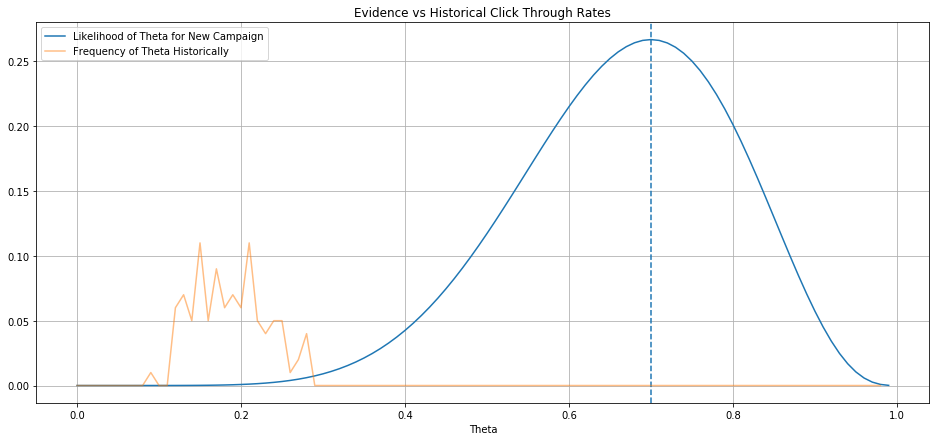

In [11]:
# Plot the histogram of previous click through rates 
# with the evidence of the new campaign
f, ax = plt.subplots(1)
ax.axvline(mle, linestyle = "--")
ax.plot(possible_theta_values, likelihoods)

zero_to_one = [j/100. for j in range(100)] # bins between 0 and 1
print("zero_to_one = ", zero_to_one)

counts, bins = np.histogram(click_through_rates, \
                            bins=zero_to_one)
print("counts = ", counts)

counts = counts / 100.
print("counts = ", counts)

ax.plot(bins[:-1], counts, alpha = .5)
line1, line2, line3 = ax.lines
ax.legend((line2, line3), ('Likelihood of Theta for New Campaign'
                           , 'Frequency of Theta Historically')
                          , loc = 'upper left')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Evidence vs Historical Click Through Rates")
plt.show()

#### Clearly, the maximum likelihood method is giving us a value that is outside what we would normally see. Perhaps our analysts are right to be skeptical; as the campaign continues to run, its click-through rate could decrease. Alternatively, this campaign could be truly outperforming all previous campaigns. We can't be sure. Ideally, we would rely on other campaigns' history if we had no data from our new campaign. And as we got more and more data, we would allow the new campaign data to speak for itself.